In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
plys=pd.read_csv("C:\\Users\\jamun\\OneDrive\\Documents\\Football_players.csv")

In [15]:
print(plys.head())


       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value  Wage Preferred Foot  \
0         FC Barcelona  110500.0   565           Left   
1             Juventus   77000.0   405          Right   
2  Paris Saint-Germain  118500.0   290          Right   
3    Manchester United   72000.0   260          Right   
4      Manchester City  102000.0   355          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017  

In [17]:
print(plys.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [38]:
print(plys.describe())

                  ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2420.384468   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2000.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   
std     29965.244204      4.669943      6.908930      6.136496    5591.354494   

               Wage  International Reputation   Skill Moves        Joined  \
count  18207.000000              18159.000000  18159.000000  18207.000000   
mean       9.731312                  1.113222      2.361308   2016.420607   
min        0.000000                  1.

In [44]:
missing_values = plys.isnull().sum()

In [32]:
plys["Club"] = plys["Club"].fillna("Unknown") 

In [34]:
plys["Value"] = plys["Value"].fillna(plys["Value"].median()) 

In [36]:
plys["Contract Valid Until"] = pd.to_datetime(plys["Contract Valid Until"], errors='coerce')


In [40]:
plys = plys.dropna(subset=["International Reputation", "Skill Moves"])

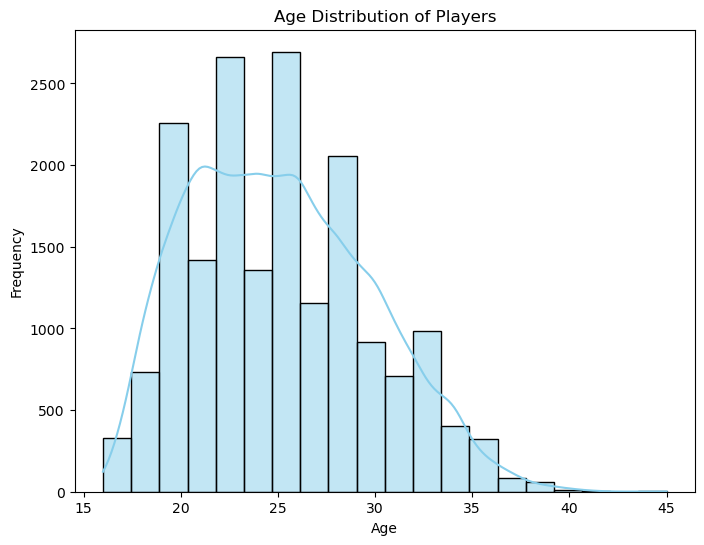

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(plys["Age"],bins=20,kde=True,color="skyblue")
plt.title("Age Distribution of Players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

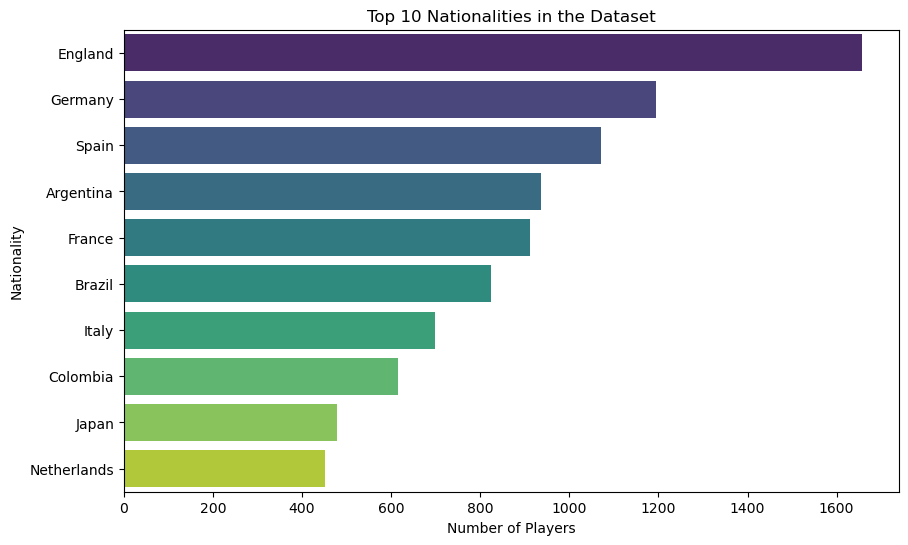

In [80]:
plt.figure(figsize=(10, 6))
nationality_counts = plys["Nationality"].value_counts().head(10)

sns.barplot(x=nationality_counts.values, y=nationality_counts.index,
            hue=nationality_counts.index, dodge=False, palette="viridis")
plt.title("Top 10 Nationalities in the Dataset")
plt.xlabel("Number of Players")
plt.ylabel("Nationality")
plt.show()

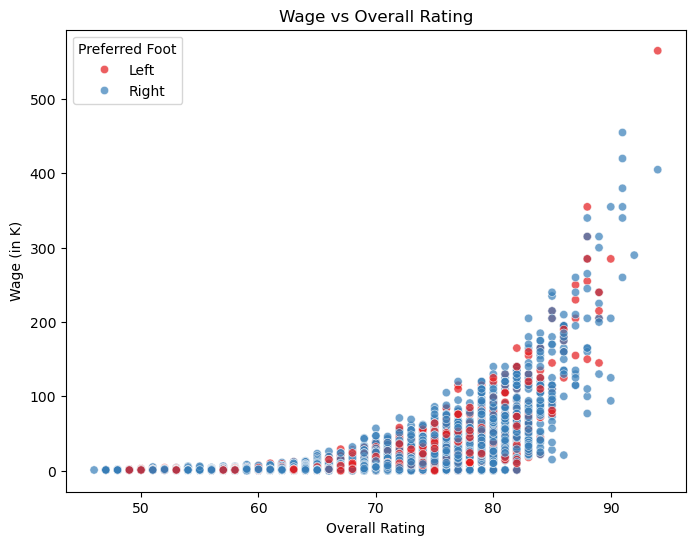

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=plys["Overall"], y=plys["Wage"], hue=plys["Preferred Foot"],
                palette="Set1", alpha=0.7)
plt.title("Wage vs Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Wage (in K)")
plt.legend(title="Preferred Foot")
plt.show()


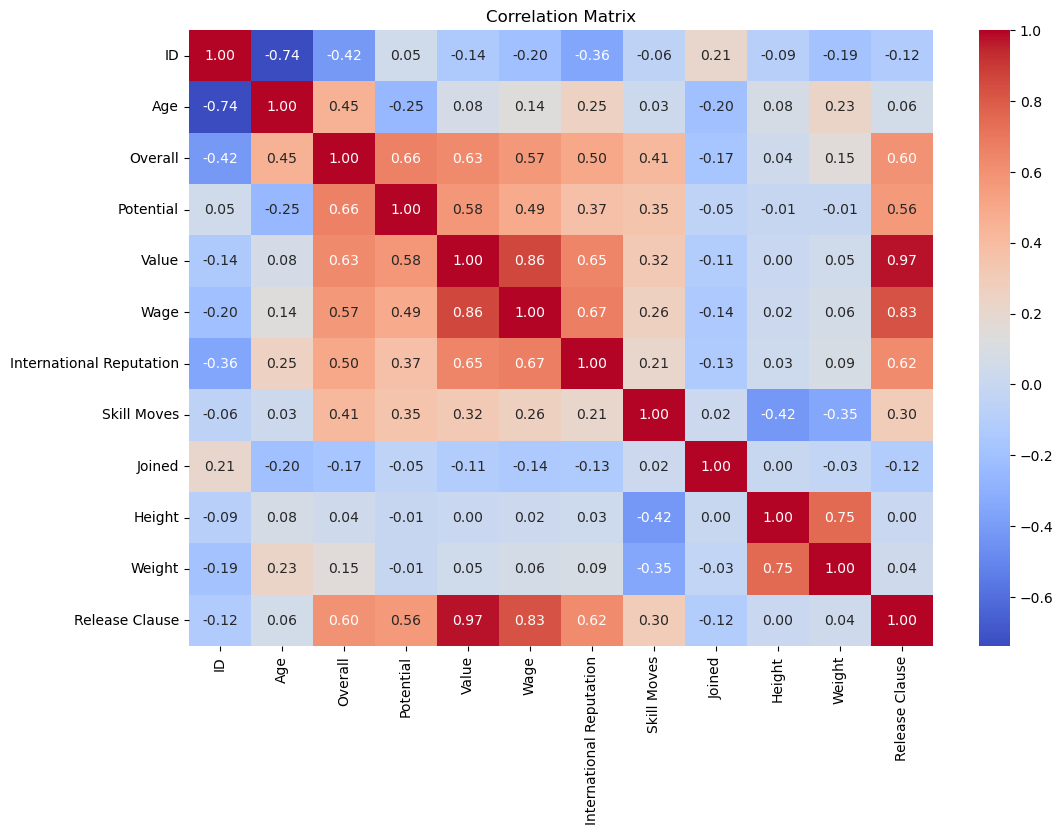

In [70]:
plt.figure(figsize=(12, 8))
corr_matrix = plys.corr(numeric_only=True) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
